# Assignment 2 - A

In [38]:
%pip install numpy pandas matplotlib seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


## Import Dependencies

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Dataset and Preprocessing

In [40]:
df = pd.read_csv('audi.csv')
print(df.shape)
df.head()

(10668, 9)


model  year  price transmission  mileage fuelType  tax   mpg  engineSize
0    A1  2017  12500       Manual    15735   Petrol  150  55.4         1.4
1    A6  2016  16500    Automatic    36203   Diesel   20  64.2         2.0
2    A1  2016  11000       Manual    29946   Petrol   30  55.4         1.4
3    A4  2017  16800    Automatic    25952   Diesel  145  67.3         2.0
4    A3  2019  17300       Manual     1998   Petrol  145  49.6         1.0

In [41]:
df = df.drop(['year'], axis=1)

### No NAN values

In [42]:
print(df.isna().sum())
df = df.dropna()

model           0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64


### Convert Strings to Categorical

In [43]:
df.head()

model  price transmission  mileage fuelType  tax   mpg  engineSize
0    A1  12500       Manual    15735   Petrol  150  55.4         1.4
1    A6  16500    Automatic    36203   Diesel   20  64.2         2.0
2    A1  11000       Manual    29946   Petrol   30  55.4         1.4
3    A4  16800    Automatic    25952   Diesel  145  67.3         2.0
4    A3  17300       Manual     1998   Petrol  145  49.6         1.0

In [44]:
df['model'].unique()

array([' A1', ' A6', ' A4', ' A3', ' Q3', ' Q5', ' A5', ' S4', ' Q2',
       ' A7', ' TT', ' Q7', ' RS6', ' RS3', ' A8', ' Q8', ' RS4', ' RS5',
       ' R8', ' SQ5', ' S8', ' SQ7', ' S3', ' S5', ' A2', ' RS7'],
      dtype=object)

In [45]:
df['transmission'].unique()

array(['Manual', 'Automatic', 'Semi-Auto'], dtype=object)

In [46]:
df['fuelType'].unique()

array(['Petrol', 'Diesel', 'Hybrid'], dtype=object)

In [47]:
def map_columns(column):
    unique_values = df[column].unique()
    mapping = {value: index + 1 for index, value in enumerate(unique_values)}
    df[column] = df[column].map(mapping)
    print(f"Mapping for {column}: {mapping}")

columns_to_map = ['model', 'transmission', 'fuelType']
for column in columns_to_map:
    map_columns(column)

Mapping for model: {' A1': 1, ' A6': 2, ' A4': 3, ' A3': 4, ' Q3': 5, ' Q5': 6, ' A5': 7, ' S4': 8, ' Q2': 9, ' A7': 10, ' TT': 11, ' Q7': 12, ' RS6': 13, ' RS3': 14, ' A8': 15, ' Q8': 16, ' RS4': 17, ' RS5': 18, ' R8': 19, ' SQ5': 20, ' S8': 21, ' SQ7': 22, ' S3': 23, ' S5': 24, ' A2': 25, ' RS7': 26}
Mapping for transmission: {'Manual': 1, 'Automatic': 2, 'Semi-Auto': 3}
Mapping for fuelType: {'Petrol': 1, 'Diesel': 2, 'Hybrid': 3}


In [48]:
df.head()

model  price  transmission  mileage  fuelType  tax   mpg  engineSize
0      1  12500             1    15735         1  150  55.4         1.4
1      2  16500             2    36203         2   20  64.2         2.0
2      1  11000             1    29946         1   30  55.4         1.4
3      3  16800             2    25952         2  145  67.3         2.0
4      4  17300             1     1998         1  145  49.6         1.0

## Center data

In [49]:
# for col in df.columns:
#     if col not in ['model', 'transmission', 'fuelType']:
#         df[col] = (df[col] - df[col].mean())
# df.head()

### Normalize?

In [50]:
for col in df.columns:
    if col not in ['model', 'transmission', 'fuelType', 'price']:
        df[col] = (df[col] - df[col].mean())/df[col].std()
df.head()

model  price  transmission   mileage  fuelType       tax       mpg  \
0      1  12500             1 -0.386817         1  0.357131  0.357533   
1      2  16500             2  0.483966         2 -1.578249  1.037081   
2      1  11000             1  0.217771         1 -1.429373  0.357533   
3      3  16800             2  0.047851         2  0.282693  1.276468   
4      4  17300             1 -0.971240         1  0.282693 -0.090351   

   engineSize  
0   -0.880177  
1    0.114919  
2   -0.880177  
3    0.114919  
4   -1.543575

### Compute Covariance Matrix

In [51]:
covMatrix = df.cov()
covMatrix

model         price  transmission      mileage  \
model            13.279320  2.295136e+04      0.580707    -0.442497   
price         22951.364135  1.372375e+08   4219.196021 -6271.623724   
transmission      0.580707  4.219196e+03      0.740908    -0.177042   
mileage          -0.442497 -6.271624e+03     -0.177042     1.000000   
fuelType          0.117386  2.164938e+02      0.010856     0.120880   
tax               1.491664  4.172323e+03      0.263908    -0.166547   
mpg              -1.506910 -7.032822e+03     -0.289528     0.395103   
engineSize        1.875264  6.926537e+03      0.293108     0.070710   

                fuelType          tax          mpg   engineSize  
model           0.117386     1.491664    -1.506910     1.875264  
price         216.493782  4172.322825 -7032.822394  6926.536661  
transmission    0.010856     0.263908    -0.289528     0.293108  
mileage         0.120880    -0.166547     0.395103     0.070710  
fuelType        0.254488    -0.053632     0.180422     0.183390  
tax            -0.053632     1.000000    -0.635909     0.393075  
mpg             0.180422    -0.635909     1.000000    -0.365621  
engineSize      0.183390     0.393075    -0.365621     1.000000

### Compute Correlation Matrix

In [52]:
corrMatrix = df.corr()
corrMatrix

model     price  transmission   mileage  fuelType       tax  \
model         1.000000  0.537631      0.185134 -0.121429  0.063855  0.409339   
price         0.537631  1.000000      0.418419 -0.535357  0.036633  0.356157   
transmission  0.185134  0.418419      1.000000 -0.205680  0.025002  0.306599   
mileage      -0.121429 -0.535357     -0.205680  1.000000  0.239618 -0.166547   
fuelType      0.063855  0.036633      0.025002  0.239618  1.000000 -0.106313   
tax           0.409339  0.356157      0.306599 -0.166547 -0.106313  1.000000   
mpg          -0.413523 -0.600334     -0.336363  0.395103  0.357648 -0.635909   
engineSize    0.514606  0.591262      0.340522  0.070710  0.363532  0.393075   

                   mpg  engineSize  
model        -0.413523    0.514606  
price        -0.600334    0.591262  
transmission -0.336363    0.340522  
mileage       0.395103    0.070710  
fuelType      0.357648    0.363532  
tax          -0.635909    0.393075  
mpg           1.000000   -0.365621  
engineSize   -0.365621    1.000000

### Visualize Matrices

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 [Text(0, 0.5, 'model'),
  Text(0, 1.5, 'price'),
  Text(0, 2.5, 'transmission'),
  Text(0, 3.5, 'mileage'),
  Text(0, 4.5, 'fuelType'),
  Text(0, 5.5, 'tax'),
  Text(0, 6.5, 'mpg'),
  Text(0, 7.5, 'engineSize')])

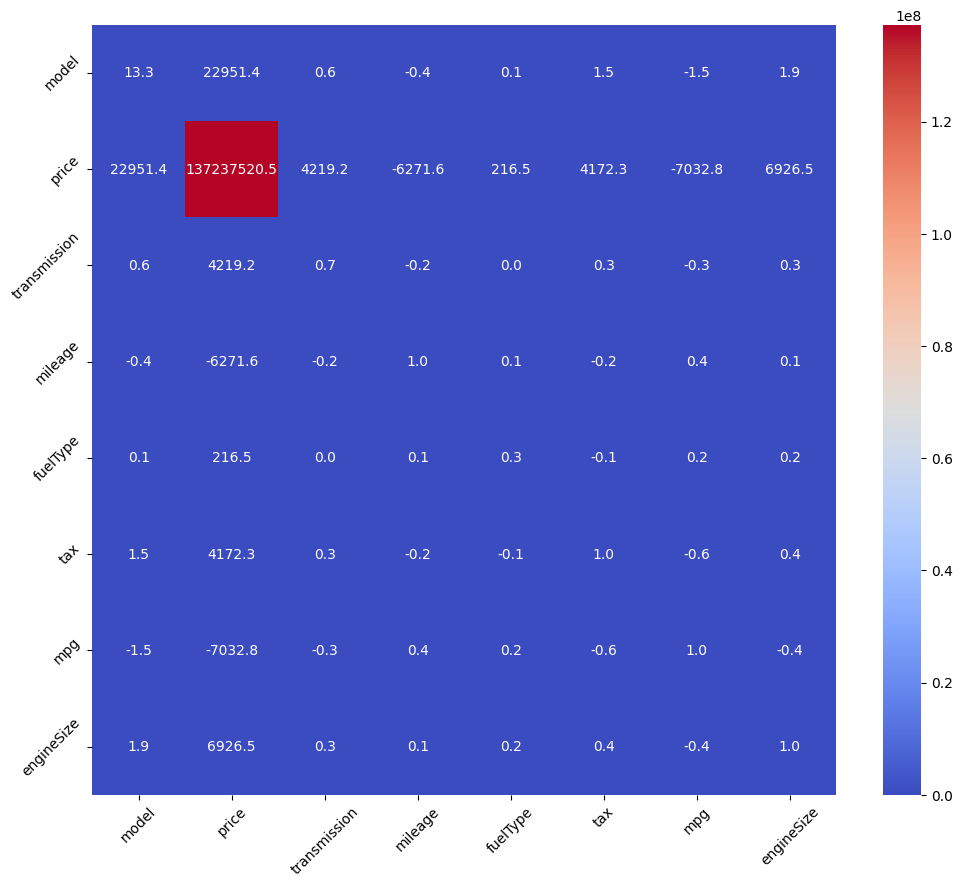

In [53]:
plt.figure(figsize=(12, 10))
sns.heatmap(covMatrix, annot=True, cmap='coolwarm', fmt='.1f', xticklabels=df.columns, yticklabels=df.columns, annot_kws={"size": 10})
plt.xticks(rotation=45)
plt.yticks(rotation=45)

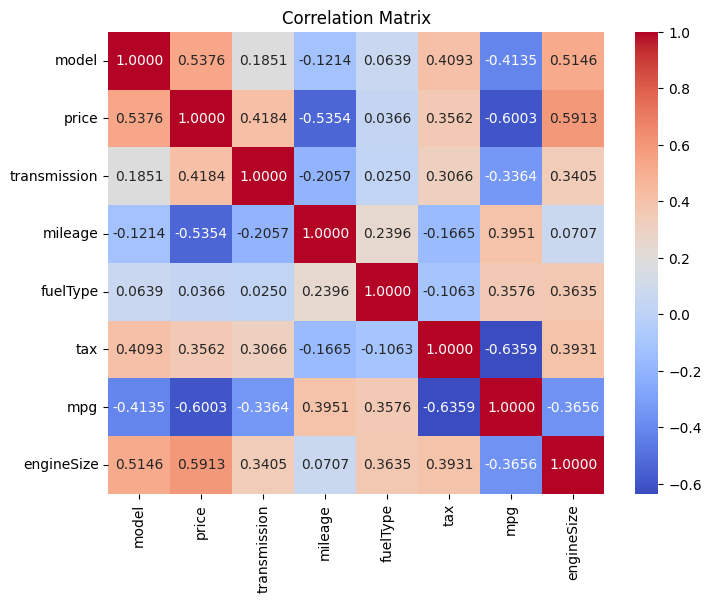

In [54]:
plt.figure(figsize=(8, 6))
sns.heatmap(corrMatrix, annot=True, cmap='coolwarm', fmt='.4f', xticklabels=df.columns, yticklabels=df.columns)
plt.title('Correlation Matrix')
plt.show()

### Eigenvector Eigenvalue Equation

In [55]:
prices = df['price']

In [56]:
df = df.drop(['price'], axis=1)

In [57]:
eigenvalues, eigenvectors = np.linalg.eig(df.cov())
eigenvalues, eigenvectors

(array([13.9988386 ,  1.63735892,  1.05534306,  0.11934464,  0.45076564,
         0.66725096,  0.34581298]),
 array([[-9.71037755e-01, -1.95083275e-01,  1.20176234e-01,
         -5.06217711e-03,  6.75227081e-02, -7.59249620e-04,
         -5.90931001e-04],
        [-5.15188833e-02,  3.44263064e-01, -2.40317957e-01,
         -5.78964742e-03,  6.74606128e-01, -6.03453649e-01,
          4.23411466e-02],
        [ 3.82585538e-02, -4.64816686e-01, -6.41506135e-01,
         -7.14583601e-02,  3.50673349e-01,  3.99943990e-01,
          2.87955414e-01],
        [-7.85487657e-03, -1.32455784e-01, -2.09088496e-01,
         -8.55728249e-01, -1.93199614e-01, -2.23608666e-01,
         -3.45076808e-01],
        [-1.23535900e-01,  4.92268182e-01, -2.69774924e-01,
          8.28572515e-02,  1.32185396e-01,  5.01775686e-01,
         -6.27307952e-01],
        [ 1.24987937e-01, -5.90531047e-01,  4.58965111e-04,
          3.90178648e-01,  1.11172592e-01, -2.71437082e-01,
         -6.30376139e-01],
        [

### Solving for Principal Components

In [58]:
k = 3

In [59]:
eigenvalueIndices = np.argsort(eigenvalues)[::-1]
eigenvaluesSorted = eigenvalues[eigenvalueIndices]
eigenvectorsSorted = eigenvectors[:, eigenvalueIndices]
selectedEigenvectors = eigenvectorsSorted[:k]
selectedEigenvalues = eigenvaluesSorted[:k]
print(eigenvaluesSorted)
eigenvectorsSorted

[13.9988386   1.63735892  1.05534306  0.66725096  0.45076564  0.34581298
  0.11934464]


array([[-9.71037755e-01, -1.95083275e-01,  1.20176234e-01,
        -7.59249620e-04,  6.75227081e-02, -5.90931001e-04,
        -5.06217711e-03],
       [-5.15188833e-02,  3.44263064e-01, -2.40317957e-01,
        -6.03453649e-01,  6.74606128e-01,  4.23411466e-02,
        -5.78964742e-03],
       [ 3.82585538e-02, -4.64816686e-01, -6.41506135e-01,
         3.99943990e-01,  3.50673349e-01,  2.87955414e-01,
        -7.14583601e-02],
       [-7.85487657e-03, -1.32455784e-01, -2.09088496e-01,
        -2.23608666e-01, -1.93199614e-01, -3.45076808e-01,
        -8.55728249e-01],
       [-1.23535900e-01,  4.92268182e-01, -2.69774924e-01,
         5.01775686e-01,  1.32185396e-01, -6.27307952e-01,
         8.28572515e-02],
       [ 1.24987937e-01, -5.90531047e-01,  4.58965111e-04,
        -2.71437082e-01,  1.11172592e-01, -6.30376139e-01,
         3.90178648e-01],
       [-1.48401363e-01,  1.37009095e-01, -6.32280090e-01,
        -3.16907175e-01, -5.91791385e-01,  7.29466379e-02,
         3.2165046

In [60]:
print(selectedEigenvalues)
selectedEigenvectors

[13.9988386   1.63735892  1.05534306]


array([[-9.71037755e-01, -1.95083275e-01,  1.20176234e-01,
        -7.59249620e-04,  6.75227081e-02, -5.90931001e-04,
        -5.06217711e-03],
       [-5.15188833e-02,  3.44263064e-01, -2.40317957e-01,
        -6.03453649e-01,  6.74606128e-01,  4.23411466e-02,
        -5.78964742e-03],
       [ 3.82585538e-02, -4.64816686e-01, -6.41506135e-01,
         3.99943990e-01,  3.50673349e-01,  2.87955414e-01,
        -7.14583601e-02]])

### Sequential Variance Increase

In [61]:
variance = []
for i in selectedEigenvalues:
    variance.append((i/sum(eigenvaluesSorted))*100)
variance

[76.6022275069708, 8.959696186317318, 5.7748811375706355]

#### Taking the rest of the variances

In [62]:
variance = []
for i in eigenvaluesSorted:
    if i not in selectedEigenvalues:
        variance.append((i/sum(eigenvaluesSorted))*100)
variance

[3.651225006970222, 2.4666083204160456, 1.8923030158605174, 0.6530588258944502]

## Visualization using Pair Plots

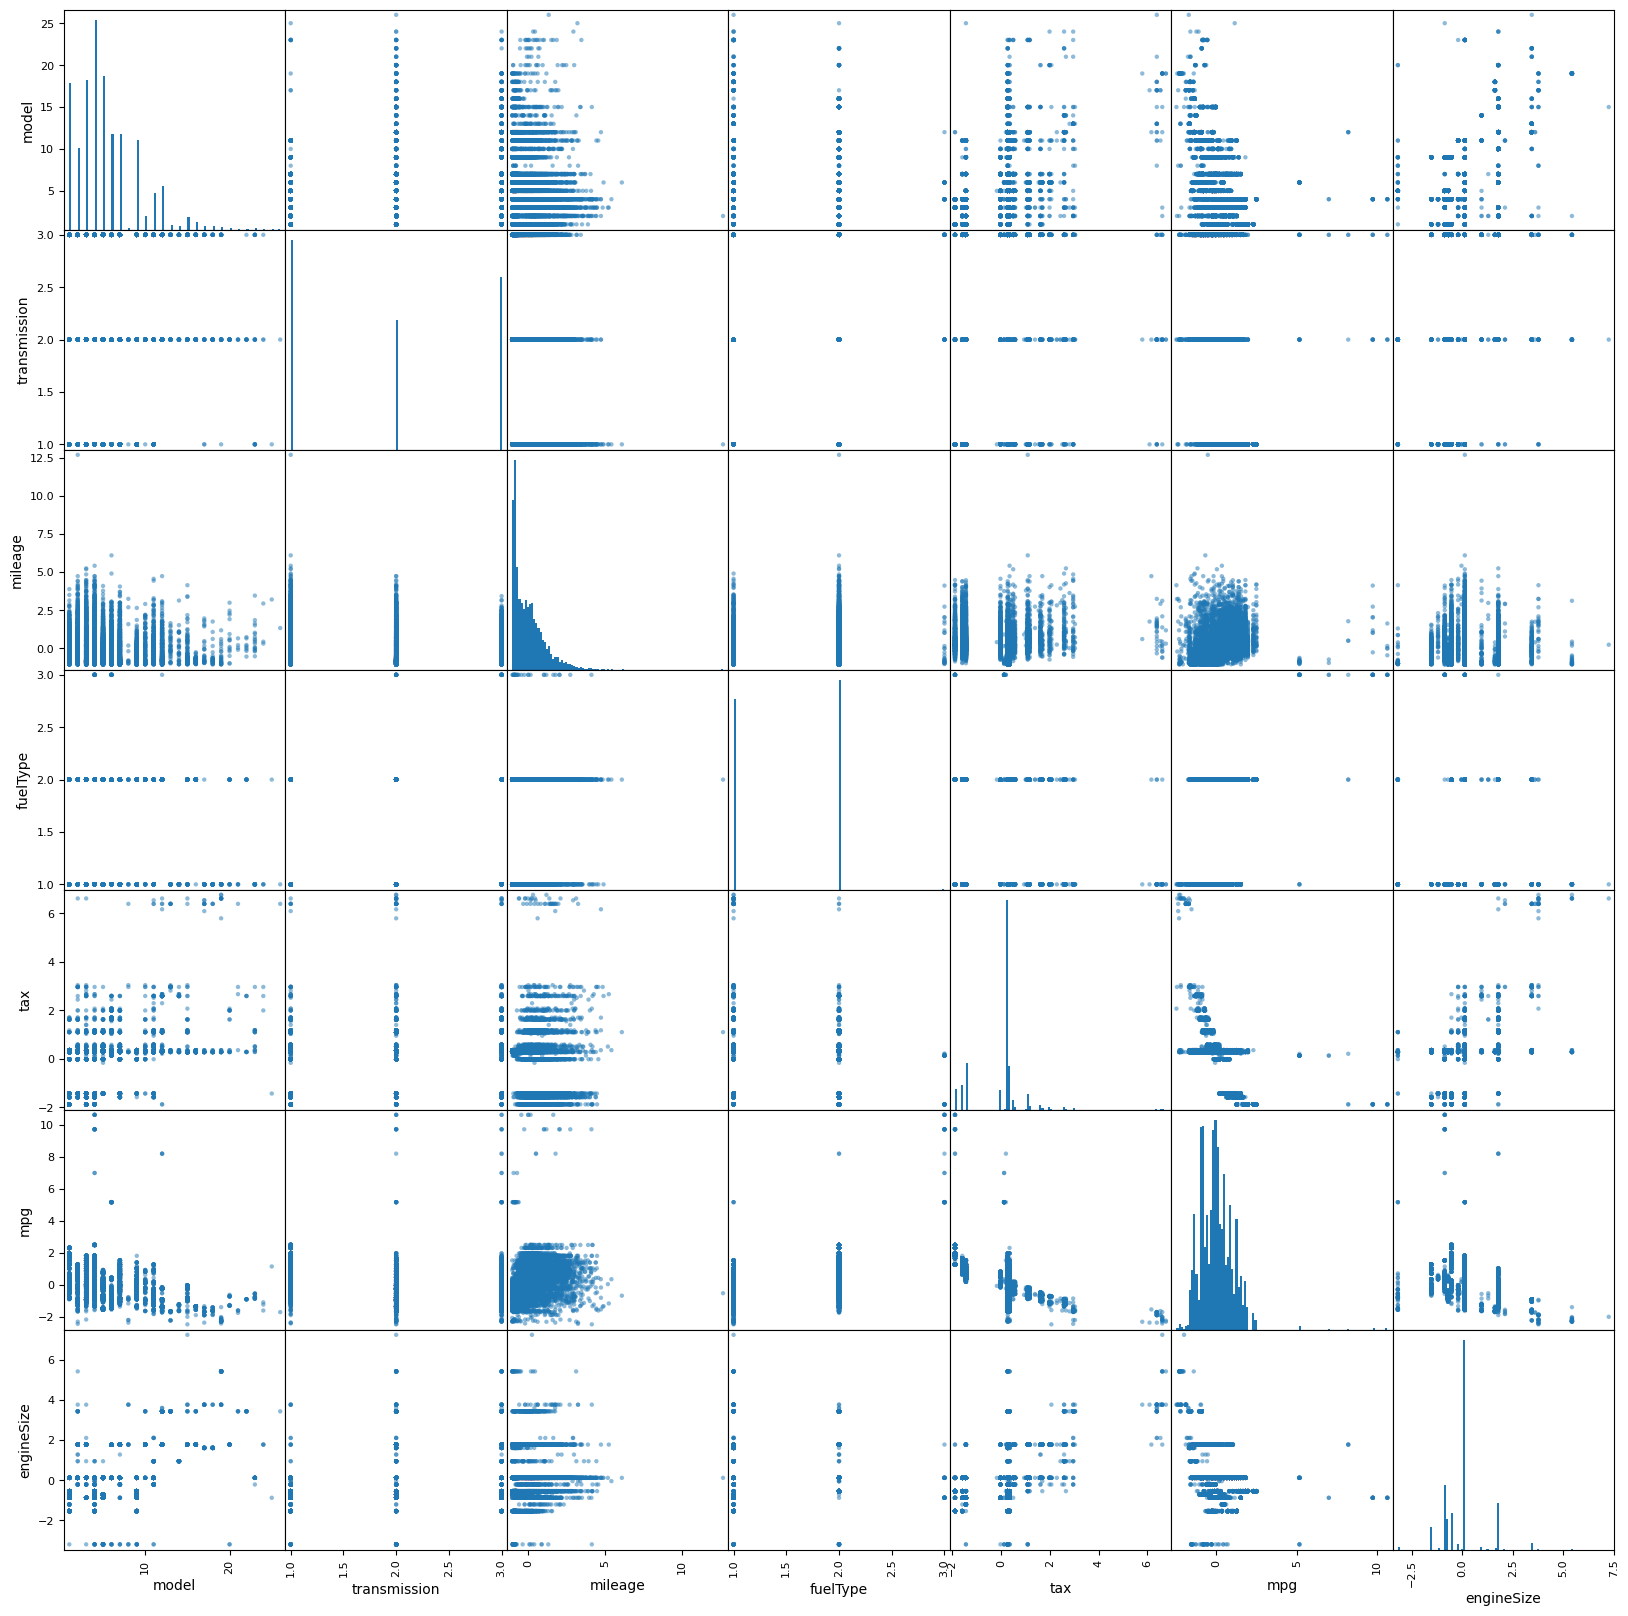

In [63]:
g = pd.plotting.scatter_matrix(df, figsize=(20,20), marker = 'o', hist_kwds = {'bins': 100}, s = 10, alpha = 0.5)

plt.show()

### Projecting Principal Components onto pair plots and visualizing as vectors

In [64]:
selectedEigenvectors

array([[-9.71037755e-01, -1.95083275e-01,  1.20176234e-01,
        -7.59249620e-04,  6.75227081e-02, -5.90931001e-04,
        -5.06217711e-03],
       [-5.15188833e-02,  3.44263064e-01, -2.40317957e-01,
        -6.03453649e-01,  6.74606128e-01,  4.23411466e-02,
        -5.78964742e-03],
       [ 3.82585538e-02, -4.64816686e-01, -6.41506135e-01,
         3.99943990e-01,  3.50673349e-01,  2.87955414e-01,
        -7.14583601e-02]])

In [65]:
target = prices

/tmp/ipykernel_13692/429336447.py:34: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()  # Adjust layout for better spacing


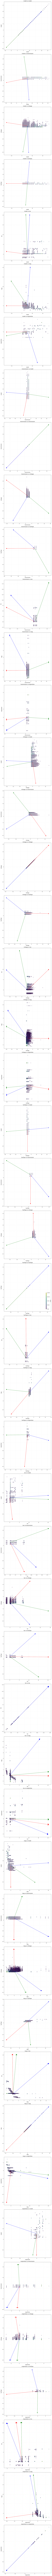

In [66]:
# Create scatter plots for each pair of features on new lines
fig, axes = plt.subplots(nrows=df.shape[1]**2, ncols=1, figsize=(10, 10 * df.shape[1]**2))

for i in range(df.shape[1]):
    for j in range(df.shape[1]):
        ax = axes[i * df.shape[1] + j]
        
        # Scatter plot with color grading based on target values
        scatter = ax.scatter(df.iloc[:, i], df.iloc[:, j], c=target, cmap='viridis', marker='o', alpha=0.5, s=30, edgecolor='black', linewidth=0.5, label='Data Points')
        ax.set_xlabel(df.columns[i], fontsize=12)
        ax.set_ylabel(df.columns[j], fontsize=12)
        ax.set_title(f"{df.columns[i]} vs {df.columns[j]}", fontsize=14)
        ax.tick_params(axis='both', which='both', labelsize=10)
        ax.grid(True, linestyle='--', alpha=0.3)

        # Plot selectedEigenvectors with arrows
        colors = ['red', 'green', 'blue']
        cnt = 0
        for egnvctr in selectedEigenvectors:
            # Calculate center dynamically
            center_x = df.iloc[:, i].mean()
            center_y = df.iloc[:, j].mean()
            
            # Calculate arrow length based on eigenvector magnitude
            arrow_length = np.linalg.norm(egnvctr) * 20
            
            # Use arrow instead of line
            ax.arrow(center_x, center_y, egnvctr[i] * arrow_length/(np.sqrt(egnvctr[j]*egnvctr[j]+egnvctr[i]*egnvctr[i])), egnvctr[j] * arrow_length/(np.sqrt(egnvctr[j]*egnvctr[j]+egnvctr[i]*egnvctr[i])), head_width=0.5, head_length=0.5, fc=colors[cnt], ec=colors[cnt])
            cnt += 1

# Add improved colorbar
cbar = plt.colorbar(scatter, ax=axes, orientation='vertical', fraction=0.02, pad=0.1, label='Target', ticks=np.linspace(target.min(), target.max(), 5))

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

### Visualizing Byplots

#### Project the Data

In [67]:
pcaDf = df.dot(selectedEigenvectors.T)
pcaDf.columns = ["PC " + str(x) for x in range(pcaDf.shape[1])]
pcaDf.shape, df.shape

((10668, 3), (10668, 7))

#### Visualize Byplots of these principal components with loadings

In [68]:
loadings = selectedEigenvectors
for i in range(loadings.shape[0]):
    loadings[i] = loadings[i]*np.sqrt(selectedEigenvalues[i])
print(loadings.shape)

(3, 7)


/tmp/ipykernel_13692/3612362027.py:44: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()  # Adjust layout for better spacing


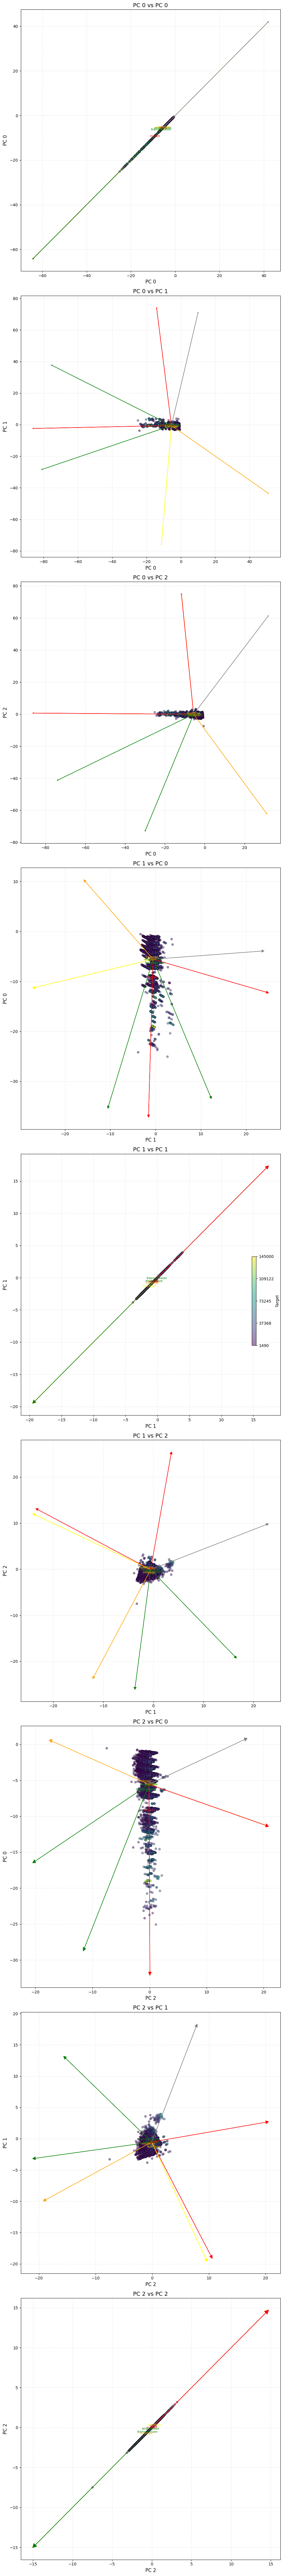

In [69]:
# Create scatter plots for each pair of features on new lines
fig, axes = plt.subplots(nrows=pcaDf.shape[1]**2, ncols=1, figsize=(10, 10 * pcaDf.shape[1]**2))

for i in range(pcaDf.shape[1]):
    for j in range(pcaDf.shape[1]):
        ax = axes[i * pcaDf.shape[1] + j]
        
        # Scatter plot with color grading based on target values
        scatter = ax.scatter(pcaDf.iloc[:, i], pcaDf.iloc[:, j], c=target, cmap='viridis', marker='o', alpha=0.5, s=30, edgecolor='black', linewidth=0.5, label='Data Points')
        ax.set_xlabel(pcaDf.columns[i], fontsize=12)
        ax.set_ylabel(pcaDf.columns[j], fontsize=12)
        ax.set_title(f"{pcaDf.columns[i]} vs {pcaDf.columns[j]}", fontsize=14)
        ax.tick_params(axis='both', which='both', labelsize=10)
        ax.grid(True, linestyle='--', alpha=0.3)

        # Plot loadings
        colors = ['red', 'green', 'orange', 'yellow', 'gray', 'red', 'green', 'orange', 'yellow', 'gray']
        cnt = 0
        # Calculate center dynamically
        center_x = pcaDf.iloc[:, i].mean()
        center_y = pcaDf.iloc[:, j].mean()
        for k in range(loadings.shape[1]):


            # Calculate arrow length based on eigenvector magnitude
            arrow_length = np.linalg.norm(loadings[i]) * 20
            mag = np.sqrt(loadings[i, k]**2 + loadings[j, k]**2)
                
            
            # ax.arrow(center_x, center_y, egnvctr[i] * arrow_length/(np.sqrt(egnvctr[j]*egnvctr[j]+egnvctr[i]*egnvctr[i])), egnvctr[j] * arrow_length/(np.sqrt(egnvctr[j]*egnvctr[j]+egnvctr[i]*egnvctr[i])), head_width=0.5, head_length=0.5, fc=colors[cnt], ec=colors[cnt])
            
            
            # Plot arrows for loadings
            ax.arrow(center_x, center_y, center_x+loadings[i, k]*arrow_length/mag, center_y+loadings[j, k]*arrow_length/mag, head_width=0.5, head_length=0.5, fc=colors[cnt], ec=colors[cnt])
            
            # Add labels near the arrows
            ax.text(center_x + loadings[i, k], center_y + loadings[j, k], f'{df.columns[k]}', color=colors[cnt], fontsize=8, ha='center', va='center')
            
            cnt += 1

# Add improved colorbar
cbar = plt.colorbar(scatter, ax=axes, orientation='vertical', fraction=0.02, pad=0.1, label='Target', ticks=np.linspace(target.min(), target.max(), 5))

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

## Testing on Linear Regression

In [70]:
def fit_linear_regression(x, y, lr=0.00001, e=0.9):
    # Insert new column with ones (bias)
    regression = np.c_[x, np.ones(len(x))]
    # Weights with same width as x
    weights = np.ones(regression.shape[1])
    # Gradient Descent
    norma = 1
    while(norma > e):
        y_pred = regression @ weights
        partial = regression.T @ (y-y_pred)
        norma = np.sum(np.sqrt(np.square(partial)))

        weights = weights.T + (lr*partial)

        if np.isnan(norma):
            print('MODEL DIVERGED! USE LOWER LEARNING RATE!')
        
    return weights

def predict(w, x):
    return w[:-1] @ np.array(x).T + w[-1]

def MSE(y, y_pred):
    return np.sum(np.square(y - y_pred))/float(len(y))

def MAE(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

In [71]:
import time

In [72]:
start_time = time.time()

# Fit linear regression using gradient descent
weights = fit_linear_regression(df, target, lr=0.000001)

# Make predictions on the original data
y_pred = predict(weights, df)

# Calculate MSE
rmse = np.sqrt(MSE(target, y_pred))
end_time = time.time()
elapsed_time = end_time - start_time
print(f'Time taken: {elapsed_time} seconds')
rmse

Time taken: 26.60940432548523 seconds


5817.958642318083

In [73]:
start_time = time.time()
# Fit linear regression using gradient descent
weights = fit_linear_regression(pcaDf, target, lr=0.000001)

# Make predictions on the transformed data
y_pred = predict(weights, pcaDf)

# Calculate MSE
rmse = np.sqrt(MSE(target, y_pred))
end_time = time.time()
elapsed_time = end_time - start_time
print(f'Time taken: {elapsed_time} seconds')
rmse

Time taken: 6.230823040008545 seconds


8960.96450991021

## Conclusion and Analysis

### Analysis

_Tasks we performed:_

1. Convert categorical columns to numerical using some mapping
2. Remove unecessary year column
3. Calculate Eigenvalues and Eigenvectors using Covariance Matrix
4. Solve for Principal Components
5. Find percentage of variance captured in each Principal Component
6. Visualize transformed data using biplots
7. Comparision Test of PCA and Regular data using Linear Regression

### Key Findings

1. Most of the variance (~91%) was covered using just 3 Principal Components. This reduced the number of components from 7 to 3...

2. In this process, we observed that while a simple Linear Regression model gave a worse MSE for the transformed data (8652.066398178978 vs 5817.958642318083), it took a much shorter time for the loss to reach the minimum (with the same learning rate)! It took only 4.167212724685669 for the model to fit the transformed features while it took almost 4 times more, 14.471240282058716, to fit the original features.